## Exploration of Amazon Review Dataset

This notebook implements an analysis of the Amazon Review Dataset as part of the Data Mining Group Project. This specific analysis focuses on the Grocery and Gourmet Food reviews.

The metadata of the review datafiles is available below:


```python
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product
```

<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Reading the Dataset

We begin by reading the file into a pandas object for inspection.

In [4]:
raw_reviews = pd.read_json('Grocery_and_Gourmet_Food_5.json', lines=True)
raw_reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN
1,5,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,NaN,NaN
2,5,True,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,NaN,NaN,NaN
3,5,True,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,NaN,NaN,NaN
4,5,True,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,NaN,NaN,NaN


In [5]:
raw_reviews.shape

(1143860, 12)

#### Shape of the Dataframe

The dataframe contains 1.14 million reviews with 12 columns. There are many columns that we will not need for the NLP tasks. So gradually, we will drop some columns. 

## 1. Basic Subsetting

The next step is to subset the data to work with a smaller more meaningful dataset. We will implement the following steps to reduce the size of our dataset.

1. `verified=True`: We will only work with verified Reviews
2. `Drop Columns`: We will drop non-essential columns
3. `drop duplicates`: We will also drop duplicates to reduce the size of the reviews


### 1.1. Selecting only verified Reviews

The code below subsets the review data into verified ones

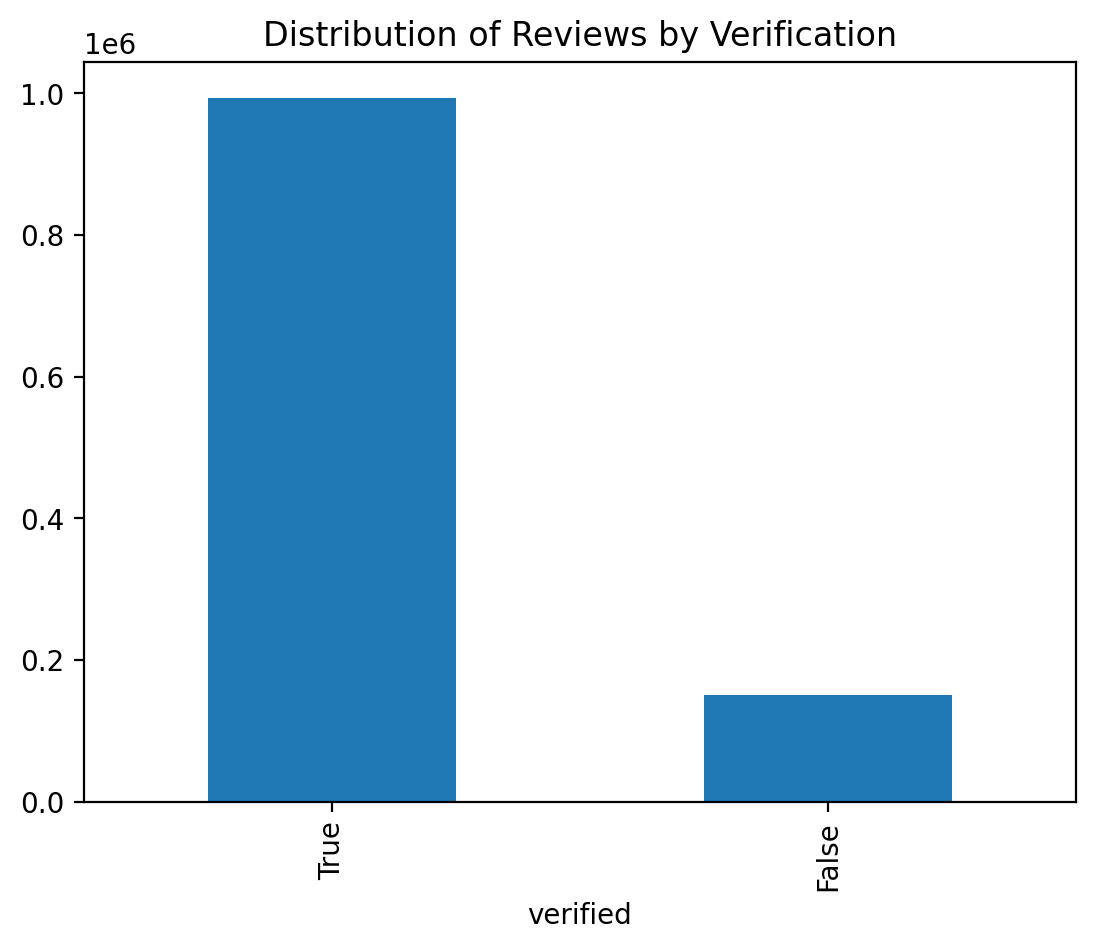

In [6]:
raw_reviews.verified.value_counts().plot(kind='bar', title='Distribution of Reviews by Verification')
plt.show()

In [7]:
verified_reviews = raw_reviews[raw_reviews.verified == True].copy()

In [8]:
verified_reviews.shape

(993847, 12)

<br>

## Note: We are now working with `~993K` reviews.

<br>

#### 1.2. Dropping Columns

There are a number of columns that are useful as metadata but will not be consequential in the NLP steps. We will need to reduce the colums to make the dataset more manageable. The important columns to keep are:

1. `overall`: This is the sentiment value
2. `reviewText`: This is the raw review
3. `summary`: Summary of the review
4. `reviewerID`: This is the ID of the reviewer. In itselt, it is not useful but for further processing.

In [9]:
verified_reviews.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

In [10]:
cols = ['overall', 'reviewText', 'summary', 'reviewerID', 'asin']
verified_reviews = verified_reviews[cols].copy()

In [11]:
verified_reviews.shape

(993847, 5)

In [12]:
verified_reviews.head()

,overall,reviewText,summary,reviewerID,asin
0,5,No adverse comment.,Five Stars,A1QVBUH9E1V6I8,4639725183
1,5,Gift for college student.,Great product.,A3GEOILWLK86XM,4639725183
2,5,"If you like strong tea, this is for you. It mi...",Strong,A32RD6L701BIGP,4639725183
3,5,Love the tea. The flavor is way better than th...,Great tea,A2UY1O1FBGKIE6,4639725183
4,5,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,A3QHVBQYDV7Z6U,4639725183


#### 1.3 Checking for Duplicates

Now that the data is scaled down, we can check for duplicates

In [13]:
verified_reviews.reviewerID.value_counts()

reviewerID
A2C9XE9I8RSKNX    373
A16DZZ68DLRDKP    253
A2MNB77YGJ3CN0    228
A258D1ZEKEV71I    213
A14B4MJ7KZE63B    200
                 ... 
ATZPI8XK3KP7        1
A2JWFIJPAJW6U8      1
A2XT8C2ASRLF2M      1
A2X6ZMJQJBW5P5      1
A2CH66YGD2DR9P      1
Name: count, Length: 125270, dtype: int64

In [14]:
verified_reviews[verified_reviews.reviewerID == 'A2C9XE9I8RSKNX']

,overall,reviewText,summary,reviewerID,asin
2334,5,It's gum- same stuff that's been around for ag...,It's gum...,A2C9XE9I8RSKNX,B0000DGDPF
9195,5,GREAT ! Just freeze dried garlic- not powder ...,"Much easier than chopping fresh, but with same...",A2C9XE9I8RSKNX,B00016XLHW
13341,4,"Good onion granules- not minced, or powder, bu...",Good stuff,A2C9XE9I8RSKNX,B0001M10ME
13432,4,"I like Frontier's brand of spices, and this is...","Good brand, great flavor",A2C9XE9I8RSKNX,B0001M10SS
13799,4,I like this for egg salad and fish dishes. Ta...,Good tarragon,A2C9XE9I8RSKNX,B0001M10LU
...,...,...,...,...,...
1122681,4,"I detest lemongrass, but for some recipes, a m...",What I wanted,A2C9XE9I8RSKNX,B00NQN1WH8
1130076,5,"Really good... like Heath made with coconut, i...",Great flavor,A2C9XE9I8RSKNX,B00VEL1KVM
1136063,4,I'd seen Eccles Cakes on the Great British Bak...,Yummy,A2C9XE9I8RSKNX,B015EQL152
1137895,5,I keep this stuff around all the time for vegg...,Pantry staple,A2C9XE9I8RSKNX,B0184CEQUU


In [15]:
duplicates = verified_reviews[verified_reviews.duplicated(keep=False)]

In [16]:
duplicates.head()

,overall,reviewText,summary,reviewerID,asin
1157,5,As advertised.,Five Stars,A2BLEBQZG7270G,B0000CFPI2
1158,5,As advertised.,Five Stars,A2BLEBQZG7270G,B0000CFPI2
1303,5,I found this product through my oldest brother...,YUMMY,ACK48CYPGLWOA,B0000CFPI2
1304,5,I found this product through my oldest brother...,YUMMY,ACK48CYPGLWOA,B0000CFPI2
1305,5,I found this product through my oldest brother...,YUMMY,ACK48CYPGLWOA,B0000CFPI2


**Note**

We note that there are a number of duplicates, ~98K reviews. The `asin` column indicates the product ID. This is a useful filter against duplicates as it lets us know that the user has duplicate entries for the same product.

In [17]:
verified_reviews.drop_duplicates(['reviewerID', 'asin'], keep='first', inplace=True)

In [18]:
verified_reviews.shape

(927413, 5)

In [19]:
verified_reviews.head()

,overall,reviewText,summary,reviewerID,asin
0,5,No adverse comment.,Five Stars,A1QVBUH9E1V6I8,4639725183
1,5,Gift for college student.,Great product.,A3GEOILWLK86XM,4639725183
2,5,"If you like strong tea, this is for you. It mi...",Strong,A32RD6L701BIGP,4639725183
3,5,Love the tea. The flavor is way better than th...,Great tea,A2UY1O1FBGKIE6,4639725183
4,5,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,A3QHVBQYDV7Z6U,4639725183


#### 1.4. Dropping asin and reviewerID

Finally, `asin` and `reviewerID` can be dropped leaving us with `overall`, `reviewText` and `summary`

In [20]:
reviews = verified_reviews[['reviewText', 'summary', 'overall']].copy()
reviews.head()

,reviewText,summary,overall
0,No adverse comment.,Five Stars,5
1,Gift for college student.,Great product.,5
2,"If you like strong tea, this is for you. It mi...",Strong,5
3,Love the tea. The flavor is way better than th...,Great tea,5
4,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,5


In [21]:
reviews.shape

(927413, 3)

### 2. Distribution of Overall Classes

With the initial parts of data subsetting out of the way, we can begin a more technical data exploration. Firstly, we look at the distribution of the reviews. This helps us gauge how much data we have to train that are both positive, negative, and neutral.

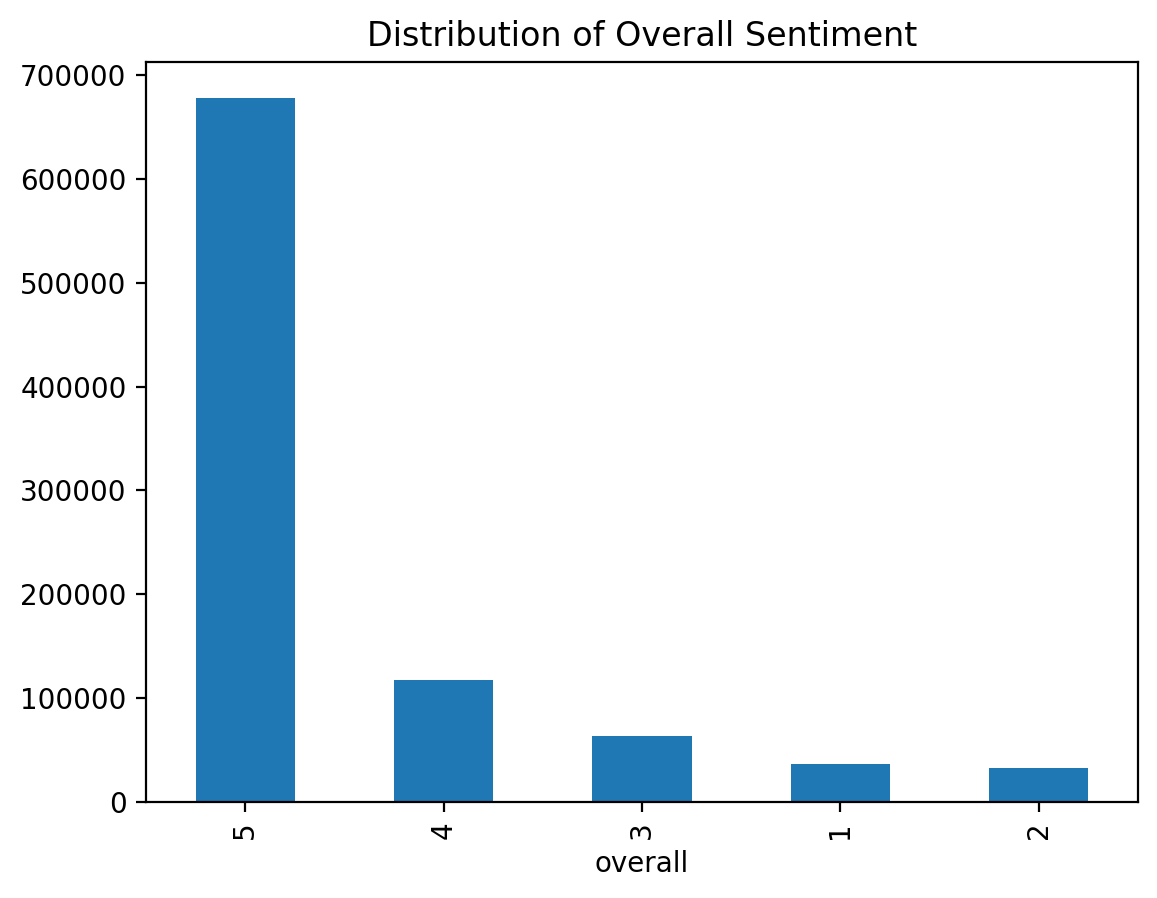

In [23]:
reviews.overall.value_counts().plot(kind='bar', title='Distribution of Overall Sentiment')
#plt.show()
plt.savefig('distribution_of_sentiment.png', dpi=200)

In [24]:
reviews.overall.value_counts(normalize=True)

overall
5    0.731380
4    0.126156
3    0.068429
1    0.039088
2    0.034947
Name: proportion, dtype: float64

**Note**
Unfortunately, we have a significant class imbalance. 

1. 73.1% of the overall review classification are 5
2. 12.6% of the review classifcation are 5. This means a combined 89% of the reviews are positive.
3. ~6% are neutral at 3.
4. Combined 6% are negative.

This will be problematic when developing the model as there are much fewer cases of negative and neutral sentiments compared to positive sentiments. However, for now, let's continue with text processing.

### 3. Exploring Reviews

The objectives of exploring the reviews is to understand the fundamental composition of the datasets through both aggregate and individual investigation. Some of the core things we need to understand include:

1. Use of punctuation
2. Use of emoji
3. Lengths of review

In [25]:
reviews.iloc[23, 0]

'Half yellow label and half black tea brewed in a French coffee pot works perfect for my taste'

In [26]:
reviews.iloc[1209, 0]

"Easy to prepare great taste. Convient to store tin.  You don't need a lot of tea to make a mug full"

#### 3.1. Use of Punctuation and Special Characters

In tranditional sentiment analysis, punctuation was often used to emphasize the extent of the review. However, in most cases, they were unnecessary. Some useful tools are now being used to convert some punctiation into words. This section explores the use of punctuation.

In [27]:
import re

# searching for all punctuation
reviews['punctuation'] = reviews['reviewText'].apply(lambda x: ''.join(set(re.findall(r'[^\w\s]+', str(x) ))) )

In [28]:
reviews.head(10)

,reviewText,summary,overall,punctuation
0,No adverse comment.,Five Stars,5,.
1,Gift for college student.,Great product.,5,.
2,"If you like strong tea, this is for you. It mi...",Strong,5,",."
3,Love the tea. The flavor is way better than th...,Great tea,5,.
4,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,5,",.!"
5,Tea made with Lipton Yellow Label teabags is m...,Four Stars,4,.
6,"I love this tea! Okay, I'm not a high falutin...",Love this tea!,5,",'.!-"
7,Discovered this tea at a local Med. Rest....a ...,Great tea,5,".....,"
8,Well I bought this tea after being in Malaysia...,Well I bought this tea after being in Malaysia...,4,",'.-:"
9,We really like this tea. It is definitely dif...,We really like this tea,5,",."


In [29]:
list(set(reviews.punctuation.tolist()))[:20]

['',
 ',!!!!!!',
 ',\'.",.,"',
 ')...,..../.)().\'$".!%-!!"),:',
 "'!!!.$$.",
 ",....().'.%-",
 ",?'...-",
 "/,~&@@'.!!!*:)...",
 '/,="<</?">=.">="/-,.',
 "/,!!!'?.",
 "),;.)().'.!!-",
 '/,().+".!-',
 '"(".',
 '),(...!$',
 '),.).")(".-',
 ',--.!"',
 '".\'."!-',
 ',..!',
 ':)!!!".',
 '),(,....']

Every review uses punction and it seems that quite a number of these reviews may emoticons to express their sentiment. Let me see examples of reviews and the use of punctuation and special characters.

In [30]:
# to make the text readable
pd.set_option('display.max_colwidth', None)  

reviews[reviews['punctuation'].str.contains(r'\$|\&') == True]

,reviewText,summary,overall,punctuation
12,"I have recently started drinking hot tea again (since my childhood when Grandma made us hot tea with milk & sugar) and have been trying different types and brands of tea to find my favorites. I can't speak the tea lover's lingo (full-bodied, smoky with hints of arsnic, etc.) but this tea is decent. I use it mostly to make iced tea but I drink it hot occasionally too. I have been completely spoiled on Dilmah tea & now any others seem inferior. Lipton Yellow Label is definitely better than PG Tips! I initially bought PG Tips and could never make a cup of hot tea that did not have a bitter after taste. I thought it was my brewing technique until I tasted better teas. I probably won't buy more of this tea since there are so many others out there to try but I plan to use up the rest of what I bought. If anyone wants some PG Tips let me know & I'll send it to you for the price of shipping!!",Not Bad for iced Tea,3,"),&.)('.!!!-"
94,"We followed the cooking directions carefully, but the curry didn't turn out so well. It was 1) super spicy, 2) extremely watery, and 3) no flavor. Quite disappointed. I'm sure we just need to tweak the recipe a little and adjust to taste at our next attempt at perfecting this dish. Despite the disappoint, this paste is really authentic and smells so good. Our entire apartment smelled like heaven as the paste was slowly bubbling on the stove. Also, it's much more expensive on Amazon - I found the exact same thing at my local Korean market for about $2.50.","It was 1) super spicy, 2) extremely watery",4,"),'.$-"
141,"Curry has officially become my FAVORITE food over the past year. I can't believe I waited 35 years to try it.\n\nWe went through all of the grocery store curry pastes and never could find one that had great flavor and spice.\n\nMae Ploy knocks it out of the park! We always have 3 or 4 of these in our fridge & pantry. These make super yummy curry with or without coconut milk (we've recently started using chicken stock instead of coconut milk to cut down on the calories)\n\nA definite MUST HAVE for curry lovers\n\nAdd some&nbsp;<a data-hook=""product-link-linked"" class=""a-link-normal"" href=""/Mae-Ploy-Sweet-Chili-Sauce-25-Ounce-Bottle-Pack-of-2/dp/B00016UX0K/ref=cm_cr_arp_d_rvw_txt?ie=UTF8"">Mae Ploy Sweet Chili Sauce, 25-Ounce Bottle (Pack of 2)</a>&nbsp;to your pantry too!",YUMMO!,5,";(';<>&=""&?"">=.-,)</)/""!=""/"
248,Going back to the CRISPY M&Ms,Three Stars,3,&
257,Been eating malted milk balls since my parents dropped off the kids at the movie theater on Saturday morning and tickets cosr $0.35.,Childhood Favorite Still Holds Up,5,.$
...,...,...,...,...
1143658,T & H make an excellent product...,"I Drink Their Tea Daily Here In California...You Should, Too!",5,&...
1143663,"Well worth the splurge to buy a great amount of REAL RAW OB honey! Think ya don't need this much honey? Well, when you start using honey as a healthy sweetener instead of sugar in everything from tea/coffee/oatmeal & toast to healthy SMOOTHIES to cooking whatever calls for sugar, you'll find you'll use a lot more than you think when get that refined sugar out of your diet!",Great price and a great product from one of Florida's oldest producers,5,"/,&'?!"
1143795,"In my youth I loved Aplets & Cotlets as candy bars. You couldn't find them everywhere, but a fancy drug store carried them. More recently I've only seen them in gift boxes. And the store where I bought them only carried them at Christmas ... and doesn't seem to have them this year. I was thrilled to see them here. Individually wrapped treats are perfect for my candy bowl. They'd also be great for a basket on a desk or for giving to staff at nursing homes, etc -- anywhere you'd like to contribute a shareable treat.\n\nThe candy has a consistency a little like gum drops and a taste of fruit, with walnuts. The rest of my big candy bowl is individually wrapped chocolates. This adds a nice variety.","Oh, nostalgic bliss

In [31]:
reviews.shape

(927413, 4)

### Notes:

There are a few notable items from this.

1. The use of `&` is shorthand for and. We could replace the special character.
2. The use of `$` denotes the expensiveness or the actual price.


<br>

#### 4.1. Replace Punctuation `&` with `and` 

The code below replaces `&` with `and`

In [32]:
reviews['reviewText'] = reviews['reviewText'].apply( lambda x: str(x).replace('&', 'and')) 

<br>

#### 4.2. Replace Numbers with Words 

Another useful item would be to replace numbers to words. Something like `1` --> `one`. To achieve this, we can use the inflect library. To do this we perform the following operations:

1. Find all Numbers using regular expression
2. Replace the numbers with words.

In [34]:
#!pip install inflect
import inflect

p = inflect.engine()

# Function to replace a matched object with its word equivalent
def replace_with_words(match):
    number = match.group(0)
    return p.number_to_words(number)

def number_to_words(text):
    # Replace all numbers in the text with their word representation
    return re.sub(r'\b\d+\b', replace_with_words, text)

  Using cached inflect-7.0.0-py3-none-any.whl.metadata (21 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.6 MB/s eta 0:00:00
  Using cached typing_extensions-4.10.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached pydantic_core-2.16.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.5 kB)
Using cached inflect-7.0.0-py3-none-any.whl (34 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 8.9 MB/s eta 0:00:00:00:01
Using cached pydantic_core-2.16.3-cp312-cp312-macosx_11_0_arm64.whl (1.7 MB)
Using cached typing_extensions-4.10.0-py3-none-any.whl (33 kB)
Using cached annotated_types-0.6.0-py3-none-any.whl (12 kB)


In [35]:
sample_text = """I give this item 1 star solely because the description for item, and the packaging shows 2 different amount....header states 2 ibs.......picture shows 3 ibs...i 
                  did not really pay attention to header description.....just read back & front label on product..... so i called amazon & the customer service  
                  lady said its suppose to be 3 ibs as shown in picture....well i recieved a 2 ib bag....so she took care of the situation like a professional 
                  ......she also stated she would report this era to the approperiate channels..i would refrain from purchasing this item until the era 
                  is corrected..... the picture shows what i recieved the other picture is what i should have recieved."""

number_to_words(sample_text)

'I give this item one star solely because the description for item, and the packaging shows two different amount....header states two ibs.......picture shows three ibs...i \n                  did not really pay attention to header description.....just read back & front label on product..... so i called amazon & the customer service  \n                  lady said its suppose to be three ibs as shown in picture....well i recieved a two ib bag....so she took care of the situation like a professional \n                  ......she also stated she would report this era to the approperiate channels..i would refrain from purchasing this item until the era \n                  is corrected..... the picture shows what i recieved the other picture is what i should have recieved.'

**Note:**

There are some issues with replace numbers. Some review use numbers to represent prioritization. i.e. 1) -- First, 2) second etc. For now, we will ignore this part.



In [38]:
pd.reset_option('^display.', silent=True)

# replaces numbers to words
reviews['reviewText'] =  reviews['reviewText'].apply(lambda x:  number_to_words(str(x)))

In [39]:
reviews.head()

,reviewText,summary,overall,punctuation
0,No adverse comment.,Five Stars,5,.
1,Gift for college student.,Great product.,5,.
2,"If you like strong tea, this is for you. It mi...",Strong,5,",."
3,Love the tea. The flavor is way better than th...,Great tea,5,.
4,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,5,",.!"


#### 4.3. Removing Punctuation

Finally, we can remove punctuation from the text completely to remain with words.

In [40]:
# replacing punctuation
reviews['reviewText'] =  reviews['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
reviews.drop(columns=['punctuation'], inplace=True)
reviews.head()

,reviewText,summary,overall
0,No adverse comment,Five Stars,5
1,Gift for college student,Great product.,5
2,If you like strong tea this is for you It migh...,Strong,5
3,Love the tea The flavor is way better than the...,Great tea,5
4,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,5


### 5. Word Cloud

This section performs a word Cloud to get a glimpse of the frequency of the words in the dataset.

In [41]:
all_text = ' '.join(reviews.reviewText.tolist())
all_text[:500]

'No adverse comment Gift for college student If you like strong tea this is for you It might even be a little too strong for me Love the tea The flavor is way better than the regular Lipton black tea Definetly worth the money I have searched everywhere until I browsed Amazon and found it  This is the tea Lipton should be selling on grocery store shelves  The stuff I last purchased is just awful and nowhere near as good as I remember Tea made with Lipton Yellow Label teabags is much better than te'

<br>

### Implementing the WordCloud

In [43]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

# specifying stop words
stop_words = set(STOPWORDS)

# Generating the word cloud
word_cloud = WordCloud(width=1600, height=800, stopwords=stop_words).generate(all_text)

  Using cached wordcloud-1.9.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.3-cp312-cp312-macosx_11_0_arm64.whl (169 kB)


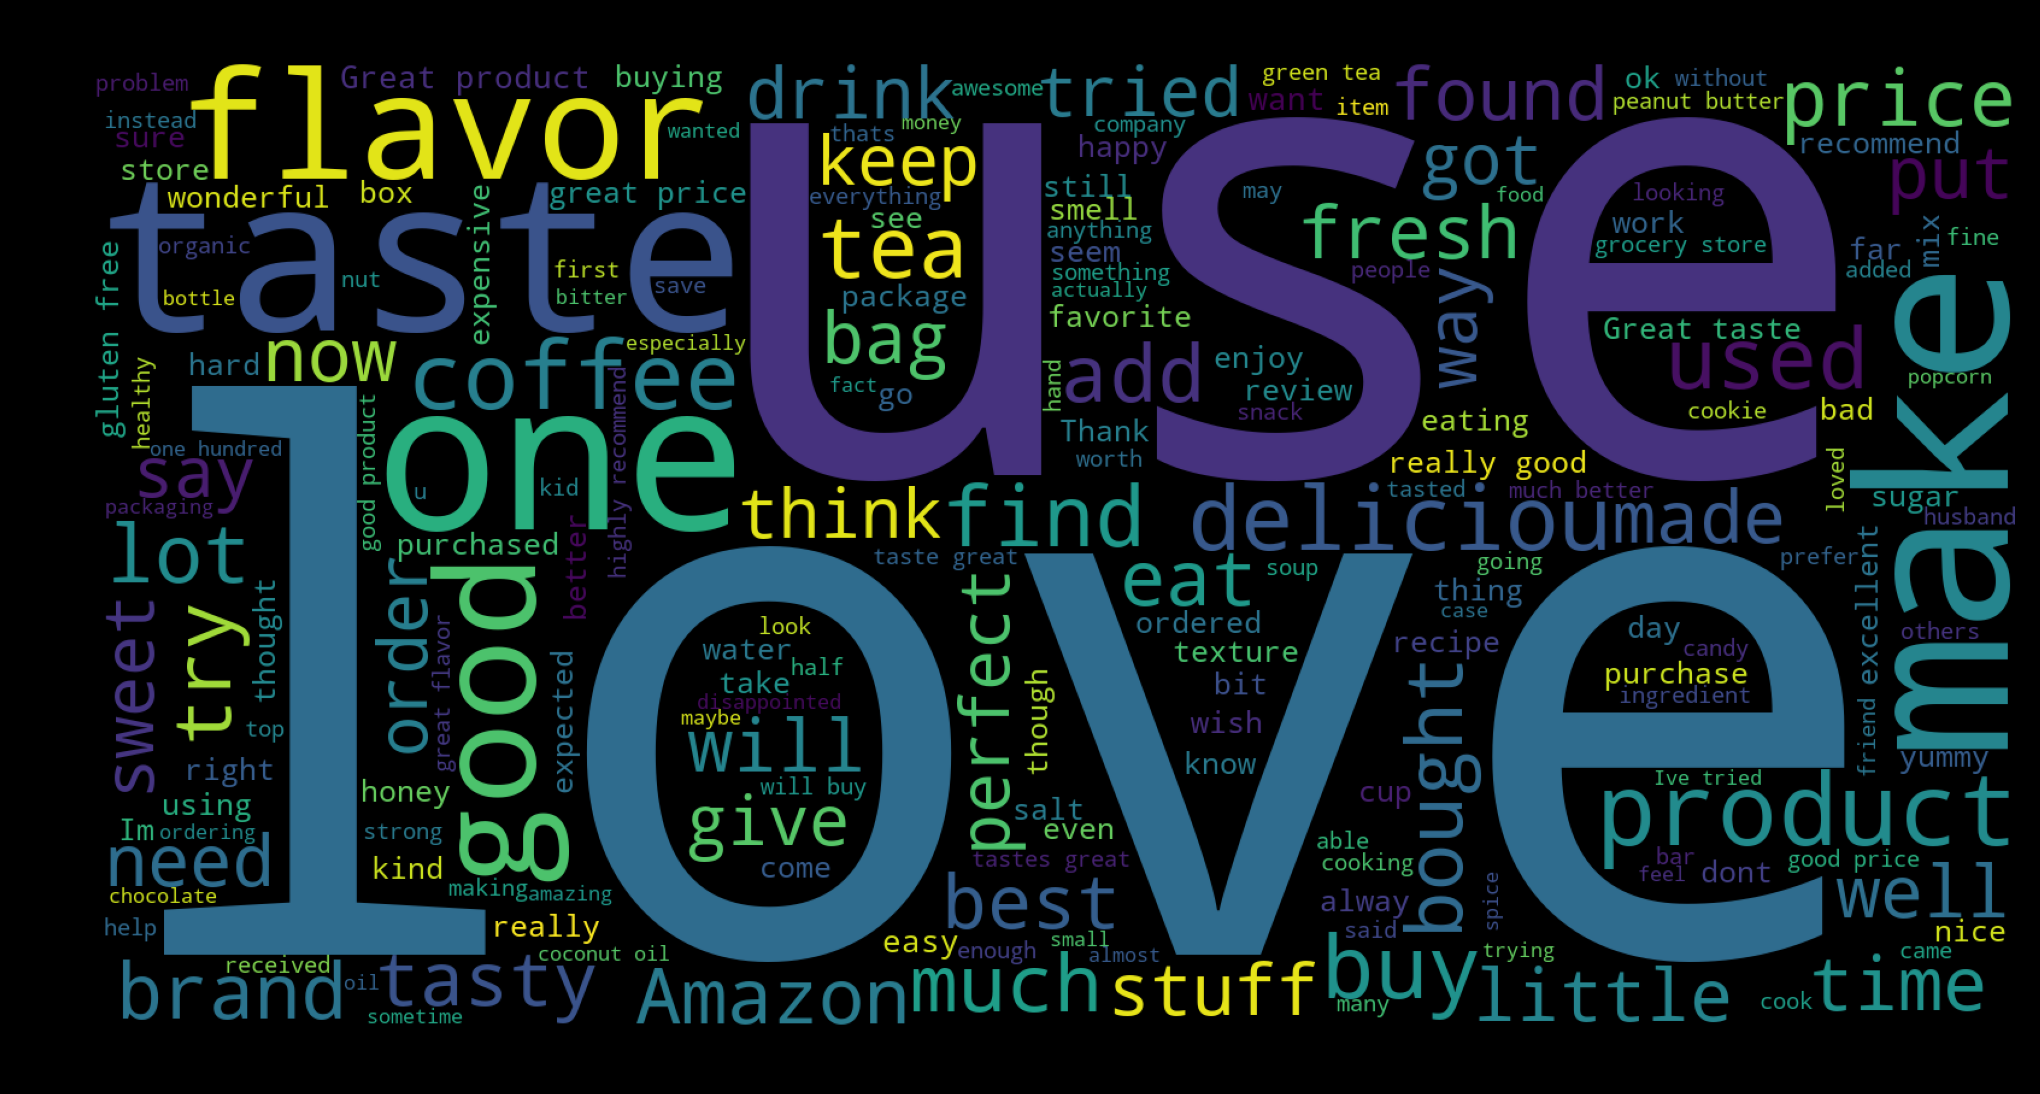

In [44]:
fig = plt.figure(1, figsize=(10, 10), facecolor='k')
plt.title('Amazon Reviews of Grocery and Gourmet Foods')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.show()
#word_cloud.to_file('wordcloud.png')


### Note:

The word cloud above is generated from reviews with the minimal application of NLP processing. To get a better insight, we will need to implement Stemming/lemmatization on the data. 

### 6. Stemming and Lemmatization

Stemming and lemmatization refers to the process of breaking down a word into it's root. For example, `lovely` becomes `love`. This helps us to significantly reduce the variation of a singular word. Below, I implement lemmatization. I will also use positional tags to further refine the lemmatization process.

In [45]:
import nltk
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()

In [46]:
pos_dict = { "N": wordnet.NOUN,  "V": wordnet.VERB, "J": wordnet.ADJ,  "R": wordnet.ADV}

In [47]:
# lemmatizing review
def lemmatize_review(text):
    new_sentence = []
    for token in nltk.pos_tag(nltk.word_tokenize(text)):
        # remove the stop words
        if token[0] not in stopwords.words('english'):
            pos = pos_dict.get(token[1][0].upper(), wordnet.NOUN)
            lemma = lemmatizer.lemmatize(token[0], pos=pos)
            new_sentence.append(lemma)
            
    return new_sentence

<br>

#### Lemmatized vs. Raw Text.

The example below shows the difference in Lemmatized Text and Raw Text

In [48]:
reviews.iloc[34, 0]

'I bought this because I miss the taste of the Lipton tea I grew up with When I was young Lipton tasted so pure and you had to hurry and take the tea out of the hot water before it got too strong It also had more of a clear astringent quality Hard to explain So I havent had that experience in a long time no matter whether I buy the bags or loose Has Lipton changed since I was young Im talking 1960sseventys maybe later Ive noticed a lot of food items have changed quality since then and have used cheaper ingredients and  or you get less Anybody else remember a difference in the old Lipton I thought buying the loose from Europe which I think this is would be better but its not'

In [49]:
print(lemmatize_review(reviews.iloc[34, 0]))

['I', 'buy', 'I', 'miss', 'taste', 'Lipton', 'tea', 'I', 'grow', 'When', 'I', 'young', 'Lipton', 'taste', 'pure', 'hurry', 'take', 'tea', 'hot', 'water', 'get', 'strong', 'It', 'also', 'clear', 'astringent', 'quality', 'Hard', 'explain', 'So', 'I', 'havent', 'experience', 'long', 'time', 'matter', 'whether', 'I', 'buy', 'bag', 'loose', 'Has', 'Lipton', 'change', 'since', 'I', 'young', 'Im', 'talk', '1960sseventys', 'maybe', 'later', 'Ive', 'notice', 'lot', 'food', 'item', 'change', 'quality', 'since', 'use', 'cheap', 'ingredient', 'get', 'less', 'Anybody', 'else', 'remember', 'difference', 'old', 'Lipton', 'I', 'think', 'buy', 'loose', 'Europe', 'I', 'think', 'would', 'good']


<br>

#### Note:

There are still some issues we cannot correct for. For example, in the above sentence that token `1960sseventys` cannot really be corrected. We will have to deal with this in choosing word frequencies.

#### Implementing Lemmatization to the Reviews

In [50]:
reviews['lemmatized_review'] = reviews.reviewText.apply(lambda x: ' '.join( lemmatize_review(str(x))) )
reviews.head()

,reviewText,summary,overall,lemmatized_review
0,No adverse comment,Five Stars,5,No adverse comment
1,Gift for college student,Great product.,5,Gift college student
2,If you like strong tea this is for you It migh...,Strong,5,If like strong tea It might even little strong
3,Love the tea The flavor is way better than the...,Great tea,5,Love tea The flavor way well regular Lipton bl...
4,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,5,I search everywhere I browse Amazon find This ...


In [51]:
reviews['lemmatized_review'] = reviews['lemmatized_review'].apply(lambda x: str(x).lower())

<br>

#### Implementing WordCloud on Lemmatized Review 

Now that we have a lemmatized the text, we can visualize it on a wordcloud.

In [52]:
word_cloud = WordCloud(width=1600, height=800, stopwords=stop_words).generate(' '.join(reviews.lemmatized_review.tolist()))

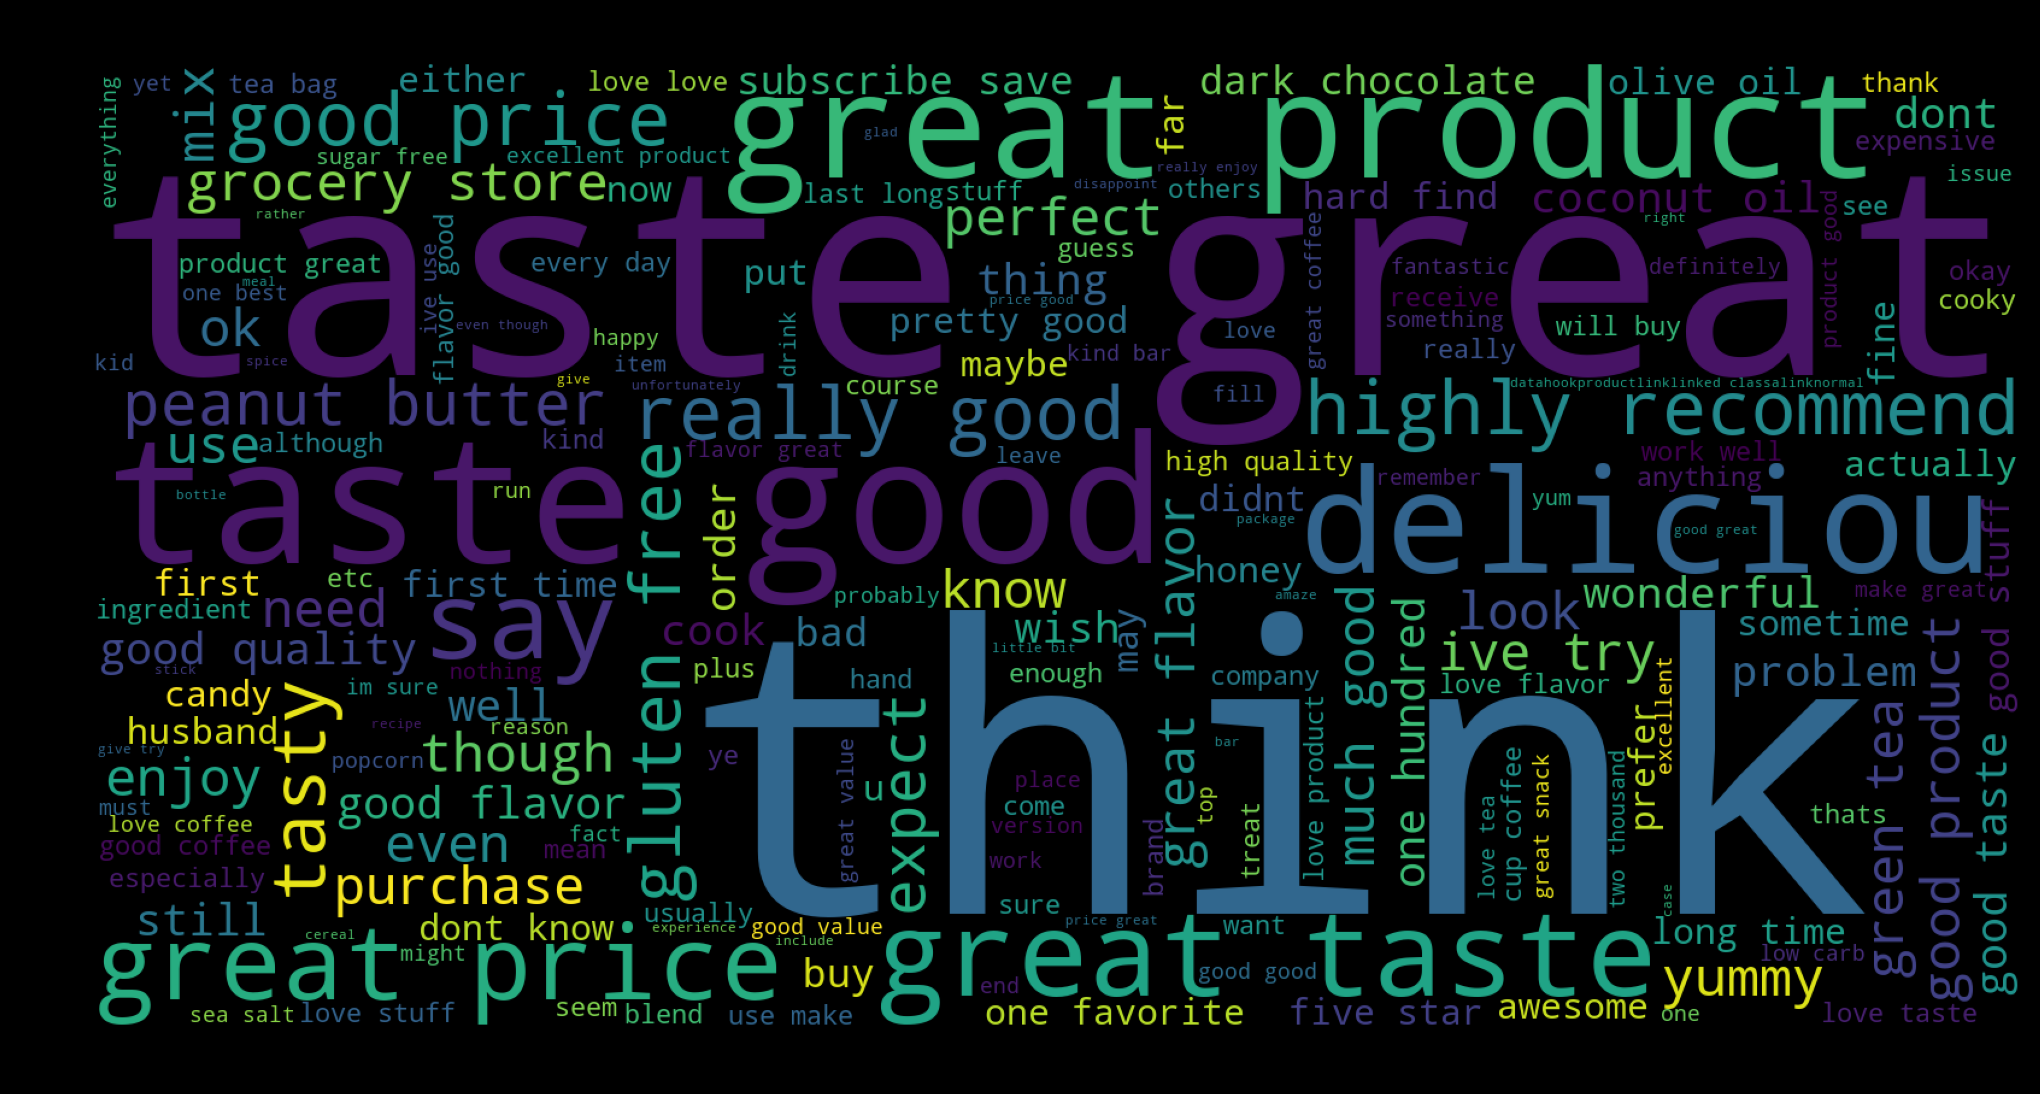

In [53]:
fig = plt.figure(1, figsize=(10, 10), facecolor='k')
plt.title('Amazon Reviews of Grocery and Gourmet Foods')
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.show()

In [79]:
reviews[['lemmatized_review', 'overall']].to_csv('Grocery_and_Gourmet_foods.csv', index=False)